#Summary
This colab is dedicated to exploring and experimenting MNIST database.It is commonly used as a benchmark dataset for training and testing machine learning models, particularly for image classification tasks.


#Importing Libraries
1. MNIST dataset
2. MatplotLibrary
3. TensorFlow
4. Numpy
5. Keras
6. Pickles
7. Google Drive

In [44]:
#Import the necessary libraries
from keras.datasets import mnist  #MNIST dataset
import matplotlib.pyplot as plt   #Plotting library
import tensorflow as tf   #open-source machine learning framework library
import numpy as np    #Computing numerical library
from keras.utils import to_categorical #Convert integers to binary matrix
from keras import layers
from keras import models
import pickle
from google.colab import drive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#MNIST dataset
The dataset is split into two sets, **TRAINING** and **TESTING** sets. Each sets consist pairs of image(X) and label(Y).

The training set has 60,000 images while the testing set has 10,000 images.

Each image has a dimension of 28 x 28 in *GRAYSCALE*

The value of each image is between 0-255; The value of each label is from 0-9

11490434/11490434 [==============================] - 0s 0us/step
Training images: (60000, 28, 28)
Testing images: (10000, 28, 28)


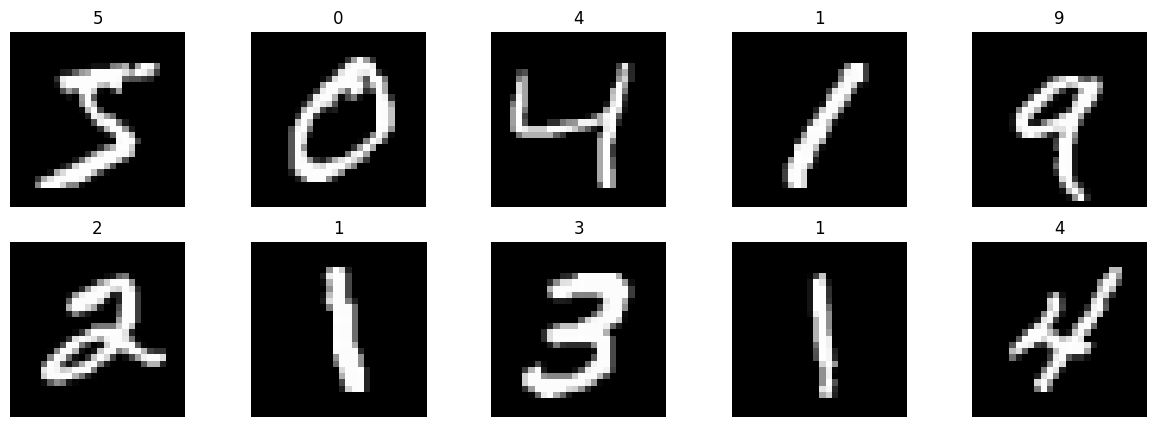

In [2]:
#Load the datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'Training images: {x_train.shape}')
print(f'Testing images: {x_test.shape}')

#Display MNIST dataset
row = 2
column = 5
fig ,axes = plt.subplots(row,column,figsize=(15,5))
for i in range(row):
  for j in range(column):
    axes[i,j].axis('off')
    axes[i,j].set_title(y_train[j+i*column])
    axes[i,j].imshow(x_train[j+i*column], cmap='gray')

Normalization is a preprocessing step in machine learning. The goal of normalization is to scale and center the input data, making it easier for the model to learn and converge during training. The L2 normalization is express as:

L2 = $\sqrt{x_1 + x_2 + x_3 + ...}$ \

The TensorFlow provides convenient functions for L2 regularization.The pixel values of each image is now range from 0 to 1


In [3]:
#TensorFlow regularization to the datasets
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

The labels are intergers by default (0-9). But the output of the Neural Network(NN) should be in binary, (3 = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]), thus Keras provides convenient functions for one-hot conversions.

In [8]:
#One hot conversions
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

print(f'{y_train[0]} = {train_labels[0]}')

5 = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


The inputs for Keras Neural Network needs to be in a specified dimension.

Input = [ batch, height, width, channel ]

Example = [ 32, 28, 28, 1 ]

In [25]:
#Input reshaping
train_images = x_train.reshape((60000,28,28,1))
test_images = x_test.reshape((10000,28,28,1))

# Simple Neural Network (KERAS)


In [40]:
#Initializing each layers in the model
model = models.Sequential(name="Simple_Neural_Network")
model.add(layers.Input(shape = (28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))
model.summary()

# Initializing the training parameters
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

# Training phase
print("------------Training Phase---------------")
model.fit(train_images, train_labels, epochs=5, batch_size = 64)

# Testing phase
print("------------Testing Phase---------------")
accuracy = model.evaluate(test_images, test_labels)
print("------------Result---------------")
print(f'accuracy = {round(accuracy[1]*100, 3)}%')

#Renaming the model variable
K_NN = model  #Keras_NeuralNetwork

Model: "Simple_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
------------Training Phase---------------
Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3574 - accuracy: 0.9019
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1776 - accuracy: 0.9487
Epoch 3/5
938/938 [==========

#Convolutional Neural Network (KERAS)

In [39]:
#Initializing each layers in the model
model = models.Sequential(name="Convolutional_Neural_Network")
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))
model.summary()

# Initializing the training parameters
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
# Training phase
print("------------Training Phase---------------")
model.fit(train_images, train_labels, epochs=5, batch_size = 64)
# Testing phase
print("------------Testing Phase---------------")
accuracy = model.evaluate(test_images, test_labels)
print("------------Result---------------")
print(f'accuracy = {round(accuracy[1]*100, 3)}%')

#Renaming the model variable
K_CNN = model  #Keras_NeuralNetwork

Model: "Convolutional_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_12 (Flatten)        (None, 57

#Confusion Matrix

313/313 [==============================] - 1s 2ms/step


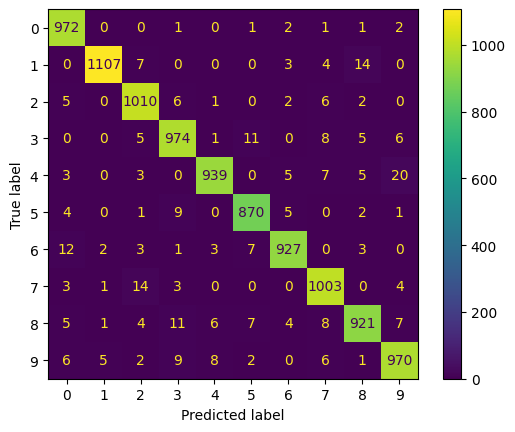

In [45]:
predictions = K_NN.predict(test_images)
_ = []
for i, value in enumerate(predictions):
  _.append(np.argmax(value))
cm = confusion_matrix(y_test, _)
disp_A = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_A.plot()
plt.show()

313/313 [==============================] - 1s 3ms/step


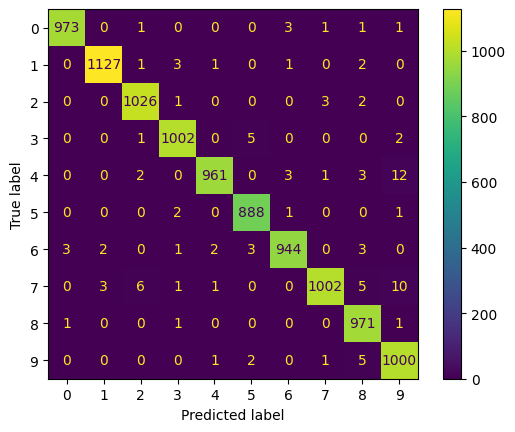

In [46]:
predictions = K_CNN.predict(test_images)
_ = []
for i, value in enumerate(predictions):
  _.append(np.argmax(value))
cm = confusion_matrix(y_test, _)
disp_B = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_B.plot()
plt.show()

#Pickles

In [ ]:
# Connect google drive to the notebook
drive.mount('/content/drive')

#Save the models to Google Drive
with open('/content/drive/MyDrive/Colab Notebooks/MNIST/MNIST_NN_Keras.pickle', 'wb') as f:
  pickle.dump(K_NN, f)
with open('/content/drive/MyDrive/Colab Notebooks/MNIST/MNIST_CNN_Keras.pickle', 'wb') as f:
  pickle.dump(K_CNN, f)

# #Load the models from Google Drive
# K_NN = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/MNIST/MNIST_NN_Keras.pickle', 'rb'))
# K_CNN = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/MNIST/MNIST_CNN_Keras.pickle', 'rb'))

#Things to do:
1. Keras Neural Network
2. Keras Convolutional Neural Network
3. Custom Neural Network Class
4. Pickles
5. Confusion Matrix